Loading libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Datasets

In [23]:
# Path with antenna connected with magnet at distance 0 cm
path_with_antenna = "/content/drive/MyDrive/yellow_floppyDisk/20231129_WaterAntenna/TXT102_wLoopOnWaterball.CSV"
# Path without antenna connected
path_without_antenna = "/content/drive/MyDrive/yellow_floppyDisk/20231129_WaterAntenna/TXT101_wLoopConnected.CSV"

# Skipping the initial header lines
data_start_line = 11

# Loading data
df_with_antenna_plain = pd.read_csv(path_with_antenna, skiprows=data_start_line).iloc[:, :2]
df_without_antenna_plain = pd.read_csv(path_without_antenna, skiprows=data_start_line).iloc[:, :2]

print("Data With Antenna (0 cm):")
print(df_with_antenna_plain.head())
print("\nData Without Antenna:")
print(df_without_antenna_plain.head())

# Path with antenna on top of the waterball nanoparticles
path_with_antenna_nano = "/content/drive/MyDrive/yellow_floppyDisk/20231129_WaterAntenna/wLoopOnNPwaterball.CSV"
# Path without antenna connected (nanoparticles)
path_without_antenna_nano = "/content/drive/MyDrive/yellow_floppyDisk/20231129_WaterAntenna/TXT101_wLoopConnected.CSV"

# Loading nanoparticles data
df_with_antenna_nano = pd.read_csv(path_with_antenna_nano, skiprows=data_start_line).iloc[:, :2]
df_without_antenna_nano = pd.read_csv(path_without_antenna_nano, skiprows=data_start_line).iloc[:, :2]

print("\nData With Antenna (0 cm) - Nanoparticles:")
print(df_with_antenna_nano.head())
print("\nData Without Antenna - Nanoparticles:")
print(df_without_antenna_nano.head())

Data With Antenna (0 cm):
          Hz     dB
0  500000000 -0.375
1  505000000 -0.322
2  510000000 -0.286
3  515000000 -0.292
4  520000000 -0.326

Data Without Antenna:
          Hz     dB
0  500000000 -0.441
1  505000000 -0.396
2  510000000 -0.364
3  515000000 -0.360
4  520000000 -0.373

Data With Antenna (0 cm) - Nanoparticles:
          Hz     dB
0  500000000 -0.378
1  505000000 -0.315
2  510000000 -0.249
3  515000000 -0.257
4  520000000 -0.260

Data Without Antenna - Nanoparticles:
          Hz     dB
0  500000000 -0.441
1  505000000 -0.396
2  510000000 -0.364
3  515000000 -0.360
4  520000000 -0.373


Preparing Data for Plotting

In [25]:
# Aligning and processing the data for the plain water dataset
df_combined_water = df_with_antenna_plain.copy()
df_combined_water['dB_without_antenna_plain'] = df_without_antenna_plain['dB']

# Calculating the difference and ratio for plain water
df_combined_water['Difference_plain'] = df_combined_water['dB'] - df_combined_water['dB_without_antenna_plain']
df_combined_water['Ratio_plain'] = df_combined_water['dB'] / df_combined_water['dB_without_antenna_plain']

# Aligning and processing the data for the nanoparticles dataset
df_combined_nano = df_with_antenna_nano.copy()
df_combined_nano['dB_without_antenna_nano'] = df_without_antenna_nano['dB']

# Calculating the difference and ratio for nanoparticles
df_combined_nano['Difference_nano'] = df_combined_nano['dB'] - df_combined_nano['dB_without_antenna_nano']
df_combined_nano['Ratio_nano'] = df_combined_nano['dB'] / df_combined_nano['dB_without_antenna_nano']


Plot the Difference

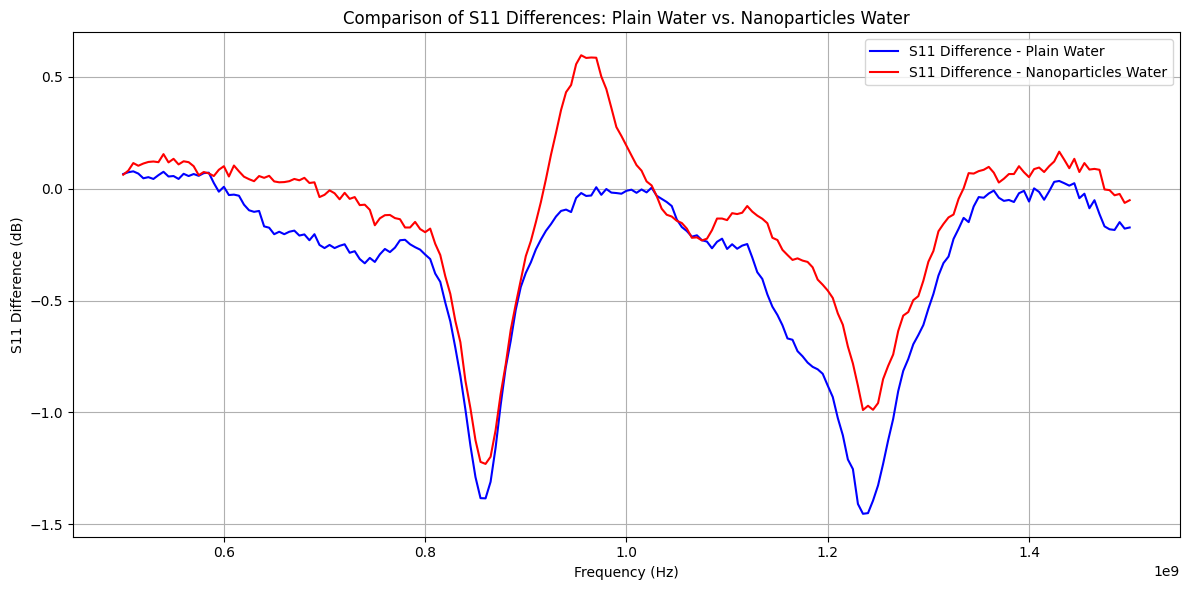

In [26]:
# Plotting the combined data
plt.figure(figsize=(12, 6))

# Plotting the difference for plain water
plt.plot(df_combined_water['Hz'], df_combined_water['Difference_plain'], label='S11 Difference - Plain Water', color='blue')

# Plotting the difference for water with nanoparticles
plt.plot(df_combined_nano['Hz'], df_combined_nano['Difference_nano'], label='S11 Difference - Nanoparticles Water', color='red')

# Adding labels, title, and legend
plt.xlabel('Frequency (Hz)')
plt.ylabel('S11 Difference (dB)')
plt.title('Comparison of S11 Differences: Plain Water vs. Nanoparticles Water')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot the Ratio

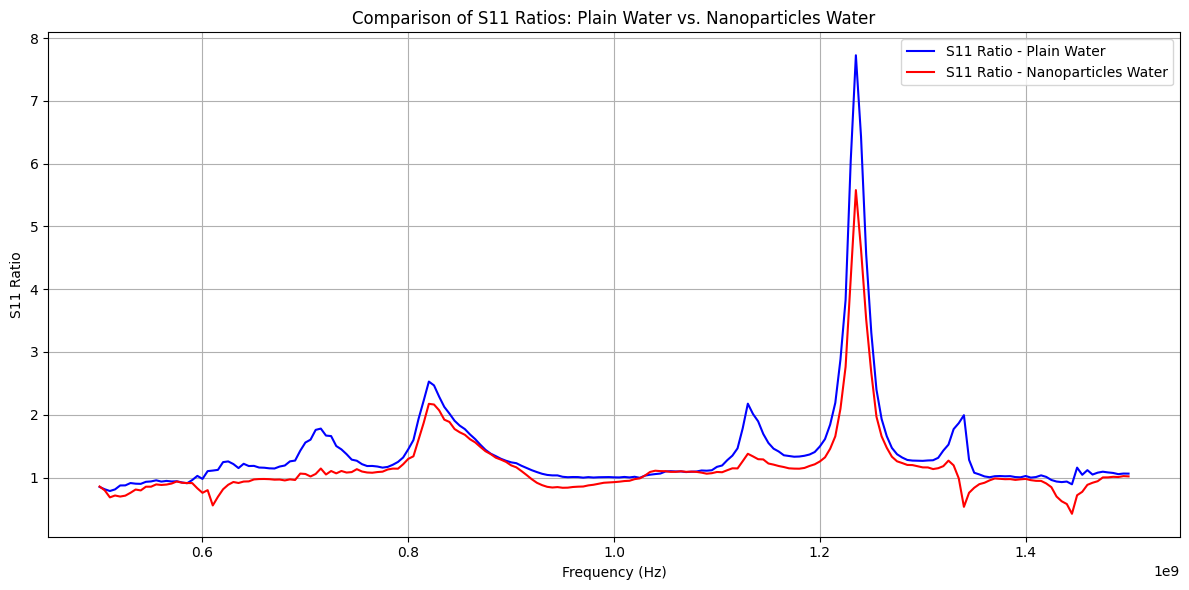

In [27]:
# Plotting the Ratio Plot for both datasets
plt.figure(figsize=(12, 6))

# Plotting the ratio for plain water
plt.plot(df_combined_water['Hz'], df_combined_water['Ratio_plain'], label='S11 Ratio - Plain Water', color='blue')

# Plotting the ratio for water with nanoparticles
plt.plot(df_combined_nano['Hz'], df_combined_nano['Ratio_nano'], label='S11 Ratio - Nanoparticles Water', color='red')

# Adding labels, title, and legend
plt.xlabel('Frequency (Hz)')
plt.ylabel('S11 Ratio')
plt.title('Comparison of S11 Ratios: Plain Water vs. Nanoparticles Water')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
